In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Open the NCVS (National Crime Victimization Survey) and explore what variables are contained (use Codebook to understand the variables).

In [ ]:
ncvs = pd.read_csv("/content/drive/MyDrive/DATA 118/VICTIMS/NCVS_2020.csv")
len(ncvs.columns.tolist())
print("There are:", str(len(ncvs))+" observations")
print(ncvs["IDHH"].nunique())


There are: 8043 observations
1811


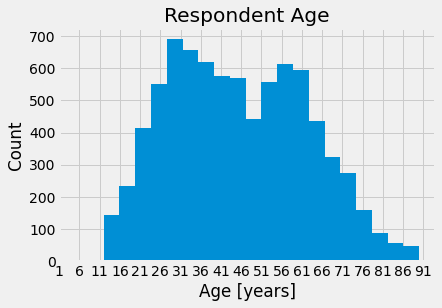

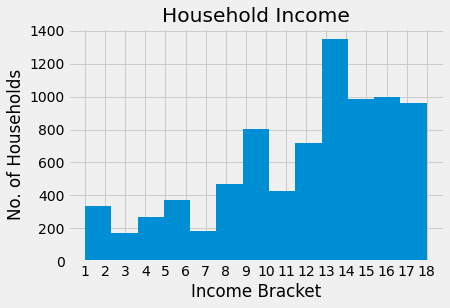

In [ ]:
plt.figure()
plt.hist(ncvs.AGE, bins=20)
plt.xlabel("Age [years]")
plt.ylabel("Count")
plt.title('Respondent Age')
plt.xticks(range(1, 95+1,5))
plt.show

plt.figure()
plt.hist(ncvs.INCOME, bins=13)
plt.xlabel("Income Bracket")
plt.ylabel("No. of Households")
plt.title('Household Income')
plt.xticks(range(1, 18+1, 1))
plt.show()

      REGION  IDHH  NUM_OVER12  NUM_UNDER12  HOUSEHOLD MEMBERS  \
0  NORTHEAST   965        2036          331               2367   
1    MIDWEST  2162        4493          883               5376   
2      SOUTH  2304        4904          873               5777   
3       WEST  2612        5738         1062               6800   

   SAMPLE PROPORTION  
0          11.648622  
1          26.456693  
2          28.430118  
3          33.464567  


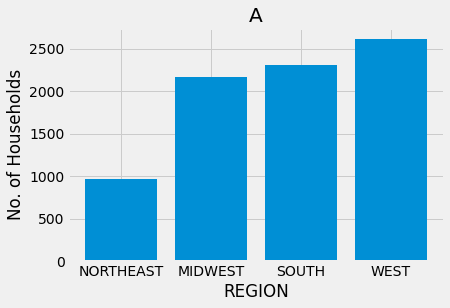

<Figure size 432x288 with 0 Axes>

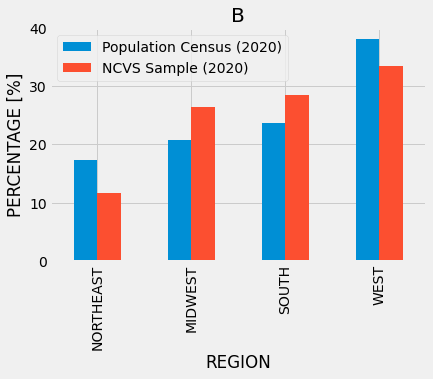

,REGION,IDHH,NUM_OVER12,NUM_UNDER12,HOUSEHOLD MEMBERS,SAMPLE PROPORTION,POPULATION PROPORTION
0,NORTHEAST,965,2036,331,2367,11.648622,17.3
1,MIDWEST,2162,4493,883,5376,26.456693,20.8
2,SOUTH,2304,4904,873,5777,28.430118,23.7
3,WEST,2612,5738,1062,6800,33.464567,38.1


In [ ]:
ncvs = ncvs.loc[(ncvs['NUM_REPORT']<=98) & (ncvs['NUM_REPORT'] != 0)]

regions = ncvs.pivot_table(index=['REGION'],
                            aggfunc={'IDHH':np.size,"NUM_UNDER12": np.sum, "NUM_OVER12":np.sum}).reset_index()

regions["REGION"] = regions["REGION"].replace(1, "NORTHEAST").replace(2, "MIDWEST").replace(3, "SOUTH").replace(4, "WEST")
regions["HOUSEHOLD MEMBERS"]=regions["NUM_UNDER12"]+regions["NUM_OVER12"]
members = regions["HOUSEHOLD MEMBERS"].sum()
regions["SAMPLE PROPORTION"]=(regions["HOUSEHOLD MEMBERS"]/members)*100
print(regions)

plt.figure()
plt.bar(regions["REGION"], regions["IDHH"])
plt.xlabel("REGION")
plt.ylabel("No. of Households")
plt.title("A")
plt.show()

pop_rates = pd.DataFrame(
  { "REGION": ["NORTHEAST", "MIDWEST", "SOUTH", "WEST"],
   "POPULATION PROPORTION": [17.3,20.8,23.7,38.1]}
)
pop_rates

regions_merged = pd.merge(regions, pop_rates,on="REGION", how="outer")

plt.figure()
regions_merged.plot(x="REGION", y=["POPULATION PROPORTION", "SAMPLE PROPORTION"], kind="bar")
plt.ylabel("PERCENTAGE [%]")
plt.title("B")
plt.legend(['Population Census (2020)',"NCVS Sample (2020)"])
plt.show()

regions_merged

In [ ]:
urbanicity_gated = ncvs[ncvs.GATED == 1].pivot_table(index=['URBANICITY'],
                            aggfunc={'IDHH':np.size, "NUM_REPORT": np.sum,
                            "INCOME": np.mean}).reset_index()
urbanicity_gated["URBANICITY"] = urbanicity_gated["URBANICITY"].replace(1, "URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
urbanicity_gated["REPORT_PROP"]= urbanicity_gated["NUM_REPORT"]/urbanicity_gated["IDHH"]
print(urbanicity_gated)

urbanicity_ungated = ncvs[ncvs.GATED == 2].pivot_table(index=['URBANICITY'],
                            aggfunc={'IDHH':np.size, "NUM_REPORT": np.sum,
                            "INCOME": np.mean}).reset_index()
urbanicity_ungated["URBANICITY"] = urbanicity_ungated["URBANICITY"].replace(1, "URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
urbanicity_ungated["REPORT_PROP"]= urbanicity_ungated["NUM_REPORT"]/urbanicity_ungated["IDHH"]
print(urbanicity_ungated)

gate_access = ncvs.pivot_table(index=['GATED'], columns = ["URBANICITY"],
                            aggfunc={"NUM_REPORT": np.mean}).reset_index()
gate_access["GATED"]=gate_access["GATED"].replace(1, "YES").replace(2, "NO")
# gate_access["URBANICITY"]=gate_access["URBANICITY"].replace(1, "URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
gate_access

  URBANICITY  IDHH     INCOME  NUM_REPORT  REPORT_PROP
0      URBAN   217  11.382488         339     1.562212
1   SUBURBAN   483  11.144928         767     1.587992
2      RURAL    52  12.769231          74     1.423077
  URBANICITY  IDHH     INCOME  NUM_REPORT  REPORT_PROP
0      URBAN  1224  12.455065        2074     1.694444
1   SUBURBAN  4959  11.904618        8177     1.648921
2      RURAL  1108  11.250000        2174     1.962094


GATED NUM_REPORT                    
URBANICITY                1         2         3
0            YES   1.562212  1.587992  1.423077
1             NO   1.694444  1.648921  1.962094

   NUM_REPORT  IDHH   INCOME  
0       1      1691  12.995269
1       2       546  12.728938
2       3       189  12.222222
3       4        84  13.095238
4       5        65  12.076923
5       6        12   6.000000
6       7        14  18.000000
7      10        10  15.000000


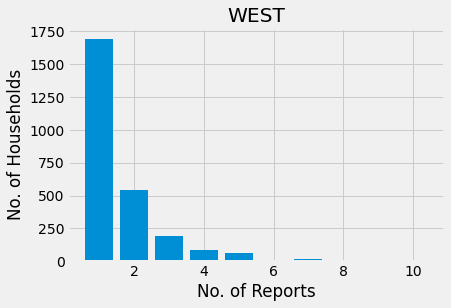

0.32269503546099293

In [ ]:
reports = ncvs[ncvs.REGION==4].pivot_table(index=['NUM_REPORT'],
                            aggfunc={'IDHH':np.size,
                            "INCOME": np.mean}).reset_index()
print(reports)
#Can reproduce for all regions or for individual regions

plt.figure()
plt.bar(reports["NUM_REPORT"], reports["IDHH"])
plt.xlabel("No. of Reports")
plt.ylabel("No. of Households")
plt.title("WEST")
plt.show()

186/606
444/1402
404/1512
546/1692

    INCOME  IDHH  NUM_VEHICLE  NUM_VEHICLE_THEFT
0        1   228     1.157895           0.127193
1        2   109     1.422018           0.201835
2        3   170     1.035294           0.123529
3        4   270     1.159259           0.259259
4        5   192     1.380208           0.135417
5        6   181     1.480663           0.182320
6        7   182     1.560440           0.236264
7        8   470     1.617021           0.289362
8        9   358     1.821229           0.206704
9       10   443     1.911964           0.189616
10      11   427     1.852459           0.112412
11      12   716     1.967877           0.215084
12      13  1349     2.175686           0.198666
13      15   985     2.301523           0.207107
14      16   998     2.438878           0.168337
15      17   436     2.543578           0.158257
16      18   527     2.538899           0.132827


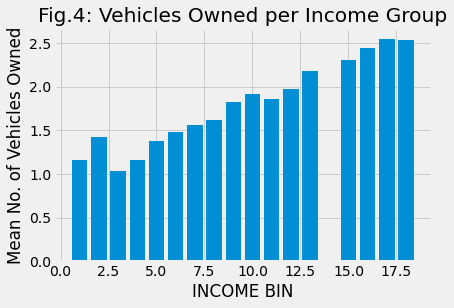

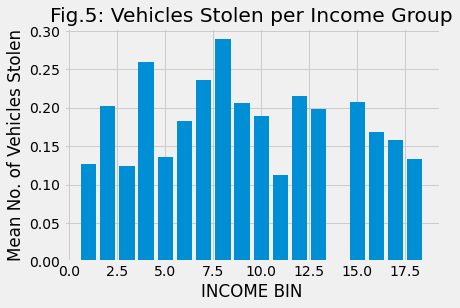

   NUM_VEHICLE  IDHH  NUM_VEHICLE_THEFT  PROP_STOLEN
0            0   659                  0            0
1            1  2348                391       918068
2            2  2447                511      1250417
3            3  1323                279       369117
4            4  1264                338       427232


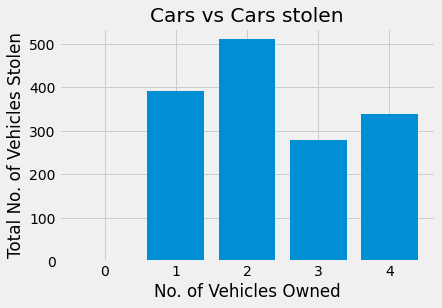

In [ ]:
#FILTER
ncvs['NUM_VEHICLE_THEFT'] = ncvs['NUM_VEHICLE_THEFT'].replace(999,0)
ncvs = ncvs.loc[ncvs["NUM_VEHICLE"]<8]
income = ncvs.pivot_table(index=['INCOME'],
                            aggfunc={'IDHH':np.size,
                            "NUM_VEHICLE": np.mean,
                            "NUM_VEHICLE_THEFT": np.mean}).reset_index()
print(income)

plt.figure()
plt.bar(income["INCOME"], income["NUM_VEHICLE"])
plt.xlabel("INCOME BIN")
plt.ylabel("Mean No. of Vehicles Owned")
plt.title("Fig.4: Vehicles Owned per Income Group")
plt.show()

plt.figure()
plt.bar(income["INCOME"], income["NUM_VEHICLE_THEFT"])
plt.xlabel("INCOME BIN")
plt.ylabel("Mean No. of Vehicles Stolen")
plt.title("Fig.5: Vehicles Stolen per Income Group")
plt.show()

theft_car = ncvs.pivot_table(index=['NUM_VEHICLE'],
                            aggfunc={'IDHH':np.size,
                            "NUM_VEHICLE_THEFT": np.sum}).reset_index()
theft_car["PROP_STOLEN"]=theft_car["IDHH"]*theft_car["NUM_VEHICLE_THEFT"]
print(theft_car)

plt.figure()
plt.bar(theft_car["NUM_VEHICLE"], theft_car["NUM_VEHICLE_THEFT"])
plt.xlabel("No. of Vehicles Owned")
plt.ylabel("Total No. of Vehicles Stolen")
plt.title("Cars vs Cars stolen")
plt.show()

In [ ]:
def sumcolumns(new,col1,col2):
  ncvs[new] = ncvs[col1] + ncvs[col2]
  return ncvs[new].reset_index()
sumcolumns("HOUSEHOLD MEMBERS", "NUM_UNDER12", "NUM_OVER12")

def ratio(new, col1, col2):
   ncvs[new] = ncvs[col1]/ncvs[col2]
   return ncvs[new].reset_index()

table = ncvs.pivot_table(index=['INCOME'],aggfunc={"IDHH": np.size, "HOUSEHOLD MEMBERS": np.sum,\
                                            "NUM_VEHICLE_THEFT": np.sum}).reset_index()

table["INCOME"]=table["INCOME"].replace(1,"LOW").replace(2,"LOW").replace(3,"LOW").replace(4,"LOW").replace(5,"LOW").replace(6,"LOW").replace(7,"LOW").replace(8,"LOW").replace(9,"LOW").replace(10,"LOW").replace(11,"LOW").replace(12,"LOW").replace(1,"LOW")
table["INCOME"]=table["INCOME"].replace(13,"MIDDLE").replace(14,"MIDDLE").replace(15,"MIDDLE").replace(16,"MIDDLE")
table["INCOME"]=table["INCOME"].replace(17,"HIGH").replace(18,"HIGH")

table2 = table.groupby("INCOME").sum().reset_index()
table2["MEAN FAMILY SIZE"] = table2["HOUSEHOLD MEMBERS"]/table2["IDHH"]
table2["MEAN VEHICLE THEFT/HOUSEHOLD"]=table2["NUM_VEHICLE_THEFT"]/table2["IDHH"]
table2.sort_values(by="MEAN FAMILY SIZE")


#HYPOTHESIS TEST
def correlation_test(var1, var2):
  outcome = pearsonr(var1, var2)
  r = round(outcome[0],4)
  p_value = round(outcome[1],4)
  plt.scatter(var1, var2)
  return [r, p_value]
# income_reports = correlation_test(table.INCOME, table.NUM_VEHICLE)
# print(income_reports)

table2.rename(columns={'NUM_VEHICLE_THEFT': 'VEHICLES STOLEN'}, inplace=True)
table2

,INCOME,HOUSEHOLD MEMBERS,IDHH,VEHICLES STOLEN,MEAN FAMILY SIZE,MEAN VEHICLE THEFT/HOUSEHOLD
0,HIGH,2862,963,139,2.971963,0.144341
1,LOW,8536,3746,740,2.278697,0.197544
2,MIDDLE,8916,3332,640,2.675870,0.192077


In [ ]:
theft = ncvs.pivot_table(index=['NUM_VEHICLE_THEFT'],aggfunc={"IDHH": np.size, "HOUSEHOLD MEMBERS": np.mean}).reset_index()
theft


,NUM_VEHICLE_THEFT,HOUSEHOLD MEMBERS,IDHH
0,0,2.517749,6930
1,1,2.530495,869
2,2,2.869863,146
3,3,2.125000,48
4,4,3.764706,34
5,5,1.000000,8
6,6,1.400000,5
7,8,3.000000,1


In [ ]:
#Cluster sampling
clusters = ncvs.groupby("PANEL_ROT_GROUP").count()["IDHH"].reset_index()
#Use clusters for your analysis.
ncvs.loc[ncvs.PRINCIPAL_SEX < 2]
clusters = ncvs.groupby("PANEL_ROT_GROUP").agg({"IDHH":np.size, "PRINCIPAL_SEX":np.size}).reset_index()


clusters = ncvs[ncvs.PRINCIPAL_SEX == 1].pivot_table(index=['PANEL_ROT_GROUP'], #MALE
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean,
                                                     "NUM_OVER12": np.mean}).reset_index()
print(clusters)

#Gauge urbanicity:
# cityboy = clusters.groupby("URBANICITY").count()["IDHH"]
# print(cityboy)
groups = np.arange(11,67+1)
np.random.choice(groups, 10, replace = False)

    PANEL_ROT_GROUP        AGE  IDHH     INCOME  NUM_OVER12  NUM_REPORT  \
0                11  41.491525    59  10.372881    1.830508    1.644068   
1                12  46.441860    43  10.720930    1.697674    1.465116   
2                13  41.754098    61  11.655738    1.786885    2.016393   
3                14  45.773585    53   9.000000    1.584906    2.132075   
4                15  41.416667    60  12.200000    1.583333    1.400000   
5                16  46.494624    93  11.290323    1.612903    1.924731   
6                17  49.736842    38   9.078947    1.552632    2.578947   
7                21  42.219512    41  11.780488    1.829268    2.463415   
8                22  44.280000    50  10.680000    1.580000    1.640000   
9                23  42.958333    48  10.145833    1.562500    1.500000   
10               24  44.291667    48  11.395833    1.291667    1.333333   
11               25  44.661017    59  11.322034    1.474576    2.254237   
12               26  48.6

array([49, 36, 38, 60, 25, 33, 62, 54, 45, 64])

In [ ]:
#different aggregate functions
ncvs2 = ncvs.loc[ncvs.NUM_OVER12 < 98]
table = ncvs2.pivot_table(index=['URBANICITY'],aggfunc={'IDHH':np.size, "NUM_OVER12":np.mean, "NUM_UNDER12": np.mean, "VEHICLE_THEFT":np.size}).reset_index()
table

,URBANICITY,IDHH,NUM_OVER12,NUM_UNDER12,VEHICLE_THEFT
0,1,1441,1.978487,0.319223,1441
1,2,5442,2.160419,0.400588,5442
2,3,1160,2.209483,0.438793,1160


In [ ]:
ncvs[ncvs.URBANICITY == 1].pivot_table(index=['YEARQ'],
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean, "INCOME": np.mean, "NUM_VEHICLE": np.mean}).reset_index()

,YEARQ,AGE,IDHH,INCOME,NUM_REPORT,NUM_VEHICLE
0,2020.1,41.825472,424,12.002358,1.759434,1.457547
1,2020.2,43.429658,263,12.893536,1.517110,1.536122
2,2020.3,45.148036,331,11.924471,1.797583,1.586103
3,2020.4,42.527187,423,12.501182,1.591017,1.425532


In [ ]:
race_filtered = ncvs.loc[(ncvs.RACE <=4)&(ncvs.RACE != 3)]
# ncvs = ncvs.loc[(ncvs['NUM_REPORT']<=98) & (ncvs['NUM_REPORT'] != 0)]
race_df = race_filtered.pivot_table(index=['RACE'],columns=["URBANICITY"], #WHITE
                                            aggfunc={"NUM_VEHICLE": np.mean,
                                                      "NUM_REPORT": np.mean,
                                                     "NUM_VEHICLE_THEFT": np.mean}).reset_index()
race_df["RACE"] = race_df["RACE"].replace(1,"WHITE/HISPANIC").replace(2, "BLACK").replace(4, "ASIAN")
race_df

RACE NUM_REPORT                     NUM_VEHICLE  \
URBANICITY                          1         2         3           1   
0           WHITE/HISPANIC   1.609053  1.610597  1.938462    1.598765   
1                    BLACK   1.940789  1.681747  1.933333    1.220395   
2                    ASIAN   1.469880  1.397906  1.000000    1.469880   

                               NUM_VEHICLE_THEFT                      
URBANICITY         2         3                 1         2         3  
0           2.102499  2.593269          0.194444  0.165433  0.300962  
1           1.736349  2.111111          0.174342  0.193448  0.266667  
2           2.130890  2.142857          0.204819  0.104712  0.142857

In [ ]:
# race_filtered = ncvs.loc[(ncvs.RACE <=4)&(ncvs.RACE != 3)]

ncvs["SEX"] = ncvs["SEX"].replace(1, "MAN").replace(2, "WOMAN")
# ncvs.rename(columns={"NUM_VEHICLE": "Vehicles Owned", "NUM_VEHICLE_THEFT": "Stolen Vehicles"})
region_table = ncvs.pivot_table(index=['URBANICITY'],columns=["SEX"],
                                            aggfunc={"INCOME": np.mean, "NUM_VEHICLE": np.mean}).reset_index()
region_table["URBANICITY"] = region_table["URBANICITY"].replace(1,"URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
# region_table["URBANICITY"] = region_table["URBANICITY"].replace(1,"URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
# print(region_table)
# region_table.columns = ['_'.join(str(s).strip() for s in col if s) for col in region_table.columns]
# region_table.reset_index(inplace=True)
region_table
# region_table2 = region_table.rename(columns={'INCOME_1': "URBAN", 'INCOME_2': 'SUBURBAN', "INCOME_3": "RURAL"})
# print(region_table2)  # old method

URBANICITY     INCOME            NUM_VEHICLE          
SEX                   MAN      WOMAN         MAN     WOMAN
0        URBAN  12.795455  11.813859    1.538352  1.438859
1     SUBURBAN  12.213451  11.520284    2.181635  1.938472
2        RURAL  11.800774  10.930016    2.723404  2.435459

In [ ]:
urbanicity = ncvs.pivot_table(index=['URBANICITY'],
                                            aggfunc={'IDHH':np.size, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean, "NUM_VEHICLE_THEFT": np.mean,
                                                     "NUM_UNDER12": np.mean}).reset_index()
urbanicity["URBANICITY"] = urbanicity["URBANICITY"].replace(1,"URBAN").replace(2, "SUBURBAN").replace(3, "RURAL")
urbanicity["CHILDREN/CAR"] = urbanicity["NUM_UNDER12"]/urbanicity["NUM_VEHICLE"]
urbanicity.rename(columns={"NUM_REPORT":"REPORTS", "NUM_UNDER12":"CHILDREN UNDER 12", "NUM_VEHICLE": "VEHICLES OWNED", "NUM_VEHICLE_THEFT": "VEHICLES STOLEN"}, inplace=True)
pd.set_option('colheader_justify', 'center')
urbanicity

,URBANICITY,IDHH,INCOME,REPORTS,CHILDREN UNDER 12,VEHICLES OWNED,VEHICLES STOLEN,CHILDREN/CAR
0,URBAN,1440,12.293750,1.675000,0.319444,1.487500,0.191667,0.214753
1,SUBURBAN,5441,11.836611,1.643632,0.400662,2.049439,0.163757,0.195498
2,RURAL,1160,11.318103,1.937931,0.438793,2.563793,0.303448,0.171150


In [ ]:
r_asian = ncvs[ncvs.PRINCIPAL_RACE == 4].pivot_table(index=['URBANICITY'], #ASIAN
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean,
                                                     "NUM_OVER12": np.mean}).reset_index()
print(r_asian["IDHH"].sum()) #311
r_asian

311


,URBANICITY,AGE,IDHH,INCOME,NUM_OVER12,NUM_REPORT,NUM_VEHICLE
0,1,39.808989,89,13.516854,2.269663,1.314607,1.528090
1,2,41.516279,215,13.641860,2.502326,1.390698,2.195349
2,3,39.142857,7,12.000000,2.571429,1.000000,2.571429


In [ ]:
r_hisp = ncvs[ncvs.HISP == 1].pivot_table(index=['URBANICITY'], #HISPANIC
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean,
                                                     "NUM_OVER12": np.mean}).reset_index()
print(r_hisp["IDHH"].sum()) #1120
r_hisp

1120


,URBANICITY,AGE,IDHH,INCOME,NUM_OVER12,NUM_REPORT,NUM_VEHICLE
0,1,40.218254,252,11.305556,2.365079,1.746032,1.833333
1,2,39.864865,814,11.567568,2.490172,1.697789,2.125307
2,3,41.203704,54,11.166667,2.703704,1.777778,2.814815


In [ ]:
race_count = []
num_vehicles = []
for i in np.arange(1,20+1):
  race_data = ncvs[ncvs.PRINCIPAL_RACE == i].pivot_table(index=['URBANICITY'],
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                            "INCOME": np.mean, "NUM_VEHICLE": np.mean,
                                            "NUM_OVER12": np.mean}).reset_index()
  print(race_data)
  race_count.append(race_data["IDHH"].sum())
  num_vehicles.append(race_data["NUM_VEHICLE"].mean())
print(sum(race_count))

   URBANICITY        AGE  IDHH     INCOME  NUM_OVER12  NUM_REPORT  NUM_VEHICLE
0           1  42.267144   977  13.196520    2.005118    1.632549     1.605937
1           2  45.616293  4321  12.061791    2.192779    1.615135     2.106457
2           3  49.158252  1030  11.463107    2.236893    1.933981     2.585437
   URBANICITY        AGE  IDHH     INCOME  NUM_OVER12  NUM_REPORT  NUM_VEHICLE
0           1  47.172297   296   9.243243    1.888514    1.925676     1.189189
1           2  43.973144   633  10.287520    1.898894    1.688784     1.696682
2           3  46.622222    45   9.777778    1.888889    1.933333     2.088889
   URBANICITY        AGE  IDHH     INCOME  NUM_OVER12  NUM_REPORT  NUM_VEHICLE
0           1  31.600000     5  10.800000    2.000000    1.800000     1.800000
1           2  44.434211    76  10.368421    2.078947    1.815789     2.026316
2           3  50.233333    30   9.566667    1.966667    2.733333     2.533333
   URBANICITY        AGE  IDHH     INCOME  NUM_OVER1

         Race  Sample Count  Sample prop %  Population prop %
0       asian           311            3.9                5.6
1       black           974           12.1               12.2
2       multi           319            4.0                2.9
3      native           111            1.4                0.7
4  white/hisp          6328           78.7               78.6
AxesSubplot(0.11,0.07;0.81x0.81)


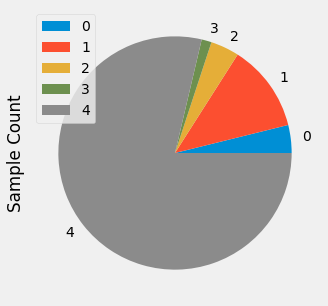

In [ ]:
p_race = pd.DataFrame({'Race': ["white/hisp", "black", "native", "asian", "multi","multi", "multi","multi","multi","multi","multi","multi","multi","multi","multi","multi","multi","multi","multi","multi"],
        'Sample Count': race_count})
        # 'Mean No. Vehicles': num_vehicles})
adj_race = p_race.groupby("Race").agg({'Sample Count':'sum'}).reset_index()
adj_race["Sample prop %"] = round((adj_race["Sample Count"]/8043)*100,1)
adj_race["Population prop %"] = np.array([5.6,12.2,2.9,0.7,78.6])
print(adj_race)
adj_race["Population prop %"].sum()
race_pie = adj_race.plot.pie(y='Sample Count', figsize=(5, 5))
print(race_pie)

In [ ]:
r_native = ncvs[ncvs.PRINCIPAL_RACE == 8].pivot_table(index=['URBANICITY'], #NATIVE
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean,
                                                     "NUM_OVER12": np.mean}).reset_index()
print(r_native["IDHH"].sum()) #111
r_native

35


,URBANICITY,AGE,IDHH,INCOME,NUM_OVER12,NUM_REPORT,NUM_VEHICLE
0,1,32.571429,21,13.095238,1.761905,1.476190,1.047619
1,2,37.230769,13,15.384615,2.153846,1.461538,2.307692
2,3,67.000000,1,1.000000,2.000000,1.000000,4.000000


In [ ]:
table = ncvs.pivot_table(index=['URBANICITY'],
                                        aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean, "INCOME": np.mean, "NUM_VEHICLE": np.mean}).reset_index()
table

,URBANICITY,AGE,IDHH,INCOME,NUM_REPORT,NUM_VEHICLE
0,1,43.087439,1441,12.293546,1.674532,1.492019
1,2,45.033076,5442,11.837192,1.643513,2.050533
2,3,48.943103,1160,11.318103,1.937931,2.563793


In [ ]:
#FILTER
ncvs['NUM_VEHICLE_THEFT'] = ncvs['NUM_VEHICLE_THEFT'].replace(999,0)
ncvs['NUM_BROKEN_IN'] = ncvs['NUM_BROKEN_IN'].replace(999,0)
ncvs = ncvs.loc[ncvs["NUM_VEHICLE"]<8]
#GATED CITY
gated_city = ncvs.loc[(ncvs['PRINCIPAL_SEX']<=2) & (ncvs['GATED']== 1) & (ncvs["URBANICITY"]==1)]
gated_city = gated_city.groupby("PRINCIPAL_SEX").agg({"IDHH":np.size,
                                          "NUM_REPORT":np.mean, "NUM_BROKEN_IN": np.mean,
                                          "NUM_VEHICLE":np.mean, "NUM_VEHICLE_THEFT":np.mean}).reset_index()
print(gated_city)
# gated_city[["IDHH", "NUM_BROKEN_IN", "NUM_REPORT"]]
#UNGATED CITY
ungated_city = ncvs.loc[(ncvs['PRINCIPAL_SEX']<=2) & (ncvs['GATED']== 2) & (ncvs["URBANICITY"]==1)]
ungated_city = ungated_city.groupby("PRINCIPAL_SEX").agg({"IDHH":np.size,
                                          "NUM_REPORT":np.mean, "NUM_BROKEN_IN": np.mean,
                                          "NUM_VEHICLE":np.mean, "NUM_VEHICLE_THEFT":np.mean}).reset_index()
print(ungated_city)
#GATED SUBURB
gated_sub = ncvs.loc[(ncvs['PRINCIPAL_SEX']<=2) & (ncvs['GATED']== 1) & (ncvs["URBANICITY"]==2)]
gated_sub = gated_sub.groupby("PRINCIPAL_SEX").agg({"IDHH":np.size,
                                          "NUM_REPORT":np.mean, "NUM_BROKEN_IN": np.mean,
                                          "NUM_VEHICLE":np.mean, "NUM_VEHICLE_THEFT":np.mean}).reset_index()
print(gated_sub)
#UNGATED SUBURBS
ungated_sub = ncvs.loc[(ncvs['PRINCIPAL_SEX']<=2) & (ncvs['GATED']== 2) & (ncvs["URBANICITY"]==2)]
ungated_sub = ungated_sub.groupby("PRINCIPAL_SEX").agg({"IDHH":np.size,
                                          "NUM_REPORT":np.mean, "NUM_BROKEN_IN": np.mean,
                                          "NUM_VEHICLE":np.mean, "NUM_VEHICLE_THEFT":np.mean}).reset_index()
print(ungated_sub)
#For Num_broken_in --> sum 0/1 and then divide y the total to get the proportion.

   PRINCIPAL_SEX  IDHH  NUM_REPORT  NUM_BROKEN_IN  NUM_VEHICLE  \
0              1    90    1.844444       0.022222     0.866667   
1              2   127    1.362205       0.165354     1.188976   

   NUM_VEHICLE_THEFT  
0           0.222222  
1           0.133858  
   PRINCIPAL_SEX  IDHH  NUM_REPORT  NUM_BROKEN_IN  NUM_VEHICLE  \
0              1   398    1.698492       0.113065     1.462312   
1              2   825    1.693333       0.146667     1.613333   

   NUM_VEHICLE_THEFT  
0           0.231156  
1           0.178182  
   PRINCIPAL_SEX  IDHH  NUM_REPORT  NUM_BROKEN_IN  NUM_VEHICLE  \
0              1   143    1.461538       0.034965     1.510490   
1              2   340    1.641176       3.041176     1.664706   

   NUM_VEHICLE_THEFT  
0           0.279720  
1           0.067647  
   PRINCIPAL_SEX  IDHH  NUM_REPORT  NUM_BROKEN_IN  NUM_VEHICLE  \
0              1  1195    1.656067       0.180753     1.861088   
1              2  3763    1.646824       0.136593     2.164496  

3705
   URBANICITY        AGE  IDHH     INCOME  NUM_REPORT  NUM_VEHICLE  \
0           1  42.401989   704  12.795455    1.610795     1.538352   
1           2  44.599436  2484  12.214573    1.576490     2.183977   
2           3  49.483559   517  11.800774    1.589942     2.723404   

   NUM_VEHICLE_THEFT  
0           0.214489  
1           0.150161  
2           0.247582  
4338
   URBANICITY        AGE  IDHH     INCOME  NUM_REPORT  NUM_VEHICLE  \
0           1  43.742198   737  11.814111    1.735414     1.447761   
1           2  45.397228  2958  11.520284    1.699797     1.938472   
2           3  48.508554   643  10.930016    2.217729     2.435459   

   NUM_VEHICLE_THEFT  
0           0.169607  
1           0.175118  
2           0.348367  


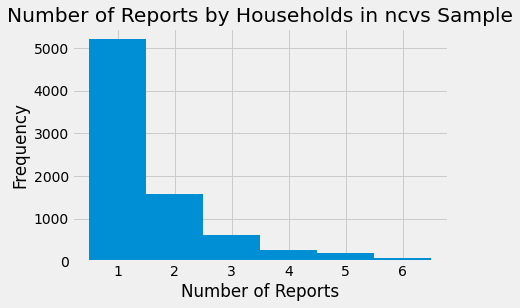

In [ ]:
males = ncvs[ncvs.SEX == 1].pivot_table(index=['URBANICITY'], #MALES
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean, "NUM_VEHICLE_THEFT": np.mean}).reset_index()
print(males["IDHH"].sum())
print(males)

females = ncvs[ncvs.SEX == 2].pivot_table(index=['URBANICITY'], #MALES
                                            aggfunc={'IDHH':np.size, "AGE":np.mean, "NUM_REPORT": np.mean,
                                                     "INCOME": np.mean, "NUM_VEHICLE": np.mean, "NUM_VEHICLE_THEFT": np.mean}).reset_index()
print(females["IDHH"].sum())
print(females)
plt.figure()
# plt.scatter(ncvs.AGE, ncvs.NUM_REPORT)
plt.hist(ncvs.NUM_REPORT, bins = np.arange(0.5,7, 1))
plt.xlabel("Number of Reports")
plt.ylabel("Frequency")
plt.title("Number of Reports by Households in ncvs Sample")
plt.show()

[-0.0442, 0.0001]

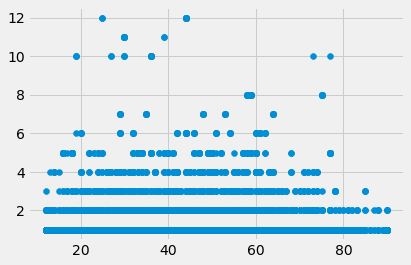

In [ ]:
#HYPOTHESIS TEST
def correlation_test(var1, var2):
  outcome = pearsonr(var1, var2)
  r = round(outcome[0],4)
  p_value = round(outcome[1],4)
  plt.scatter(var1, var2)
  return [r, p_value]
correlation_test(ncvs.AGE, ncvs.NUM_REPORT)

In [ ]:
def function(var):
#   y = x + a
#   return y

# for cell in ncvs["Colx"]:
#   ncvs["New Col"]=cell*y

# df1 = df.apply(function)

0
